# Dataset Cleaning and Merging

by Nan BAI

In [1]:
import json
import pandas as pd
import numpy as np
from argparse import Namespace
from collections import Counter
import pickle
import os
import urllib

args = Namespace(
    # Data and Path information
    save_dir = 'data_storage/',
    image_dir = 'data_storage/images/'
)

## For Original Dataset of Tripoli

### Data Imports

In [21]:
size_df = pd.read_csv('Tripoli/data_storage/GEOLOCATION.csv',sep=';')

In [60]:
size_df['index'] = size_df['PhotoId'].astype(str)

In [61]:
size_df

,UserId,Lat,Long,PhotoId,ID,Name,Nationality,Num,PhotoID,Title,Description,User tags,Time taken,Time posted,index
0,30866445 N00,"34,435237","35,843922",378083,30866445 N00,Esther Dyson,T,T1,378083,Tripoli (Lebanon) street scene,shopping alley in Tripoli,"Lebanon,shopping,market,sunglasses,Tripoli",08/09/2004 13:51,08/09/2004 20:51,378083
1,30866445 N00,"34,436678","35,844236",452228,30866445 N00,Esther Dyson,T,T1,452228,chess players in Tripoli,NaN,"Tripoli,Lebanon,April2004,chess players,chess",15/09/2004 16:17,15/09/2004 23:17,452228
2,30866445 N00,"34,435171","35,84415",452229,30866445 N00,Esther Dyson,T,T1,452229,children playing in Tripoli,so much for politics!,"Tripoli,Lebanon,April2004,children",15/09/2004 16:17,15/09/2004 23:17,452229
3,89816840 N00,"34,434144","35,844583",550247,89816840 N00,jack unrau,T,T2,550247,tripoli,October 2002.,"tripoli,lebanon,city",22/10/2002 07:21,24/09/2004 13:29,550247
4,15574596 N00,"34,426022","35,819601",4043396,15574596 N00,Nick,T,T3,4043396,From Istanbul to Cairo,"Sunday down on the beach, Tripoli, Lebanon","lebanon,tripoli",31/01/2005 13:30,31/01/2005 13:30,4043396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,92663284 N00,"34,433333","35,85",23582293739,92663284 N00,RudolfFuji,T,T185,23582293739,"Tripoli, Lebanon",NaN,NaN,06/10/2015 17:08,24/12/2015 20:18,23582293739
1195,61354839 N06,"34,45543","35,81095",23720135132,61354839 N06,Helmut Schönberger,T,T184,23720135132,Blick aus Jusufs Haus,NaN,NaN,01/08/1977 00:00,18/12/2015 15:02,23720135132
1196,61354839 N06,"34,4545","35,812999",23720144522,61354839 N06,Helmut Schönberger,T,T184,23720144522,Dia Libanon 10,NaN,NaN,01/08/1977 00:00,18/12/2015 15:02,23720144522
1197,61354839 N06,"34,4545","35,812999",23720258532,61354839 N06,Helmut Schönberger,T,T184,23720258532,Karawanserei in El Mina,NaN,NaN,01/08/1977 00:00,18/12/2015 15:09,23720258532


In [3]:
def load_images_from_category_folders(images_folder):
    all_images = {}
    all_imgs = []
    categories = []
    category_dict = {}
    for file in os.listdir(images_folder):
        if os.path.isdir(images_folder + '/' + file):
            print(file)
            categories.append(file)
            category_dict[len(category_dict)] = file
            all_images[file] = []
            for f in os.listdir(images_folder + '/' + file):
                if os.path.splitext(f)[1].lower() in ('.jpg', '.jpeg', '.png'):
                    all_images[file].append(f)
                    all_imgs.append((f, file, len(categories)))
    return all_images, all_imgs, categories, category_dict

In [4]:
images_folder = 'Tripoli/data_storage/images'
all_images_dict, all_images, categories, cat_dict = load_images_from_category_folders(images_folder)

architectural elements
form
gastronomy
interior
landscape scenery and natural features
monuments
people
product
urban scenery


In [5]:
len(all_images)

902

In [56]:
img_df = pd.DataFrame(all_images).rename(columns = {0:'image name', 1: 'category', 2: 'cat_id'})

In [57]:
img_df['index'] = img_df['image name'].apply(lambda x: x[:-4])

In [58]:
img_df

,image name,category,cat_id,index
0,10447040743.jpg,architectural elements,1,10447040743
1,11410917615.jpg,architectural elements,1,11410917615
2,11410942296.jpg,architectural elements,1,11410942296
3,11410960914.jpg,architectural elements,1,11410960914
4,11411050763.jpg,architectural elements,1,11411050763
...,...,...,...,...
897,8509557073.jpg,urban scenery,9,8509557073
898,8754214344.jpg,urban scenery,9,8754214344
899,8754216854.jpg,urban scenery,9,8754216854
900,9526228212.jpg,urban scenery,9,9526228212


In [71]:
size_df = img_df.merge(size_df, how = 'left', left_on= 'index', right_on='index')

In [72]:
size_df

,image name,category,cat_id,index,UserId,Lat,Long,PhotoId,ID,Name,Nationality,Num,PhotoID,Title,Description,User tags,Time taken,Time posted
0,10447040743.jpg,architectural elements,1,10447040743,10880980 N08,"34,433248","35,844612",1.044704e+10,10880980 N08,Sara Helwe,L,L148,1.044704e+10,The Abandoned School,Photo/editing by me\n© Sara Helwe Digital Arts,"old,vintage,school,abandoned,stairs,staircase,...",28/01/2013 12:18,23/10/2013 21:07
1,11410917615.jpg,architectural elements,1,11410917615,81483104 N07,"34,439701","35,859298",1.141092e+10,81483104 N07,Rita Kalindjian,L,L154,1.141092e+10,Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:17,17/12/2013 00:21
2,11410942296.jpg,architectural elements,1,11410942296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11410960914.jpg,architectural elements,1,11410960914,81483104 N07,"34,435683","35,842903",1.141096e+10,81483104 N07,Rita Kalindjian,L,L154,1.141096e+10,DSC_5739Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:16,17/12/2013 00:23
4,11411050763.jpg,architectural elements,1,11411050763,81483104 N07,"34,438464","35,841673",1.141105e+10,81483104 N07,Rita Kalindjian,L,L154,1.141105e+10,Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:21,17/12/2013 00:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,8509557073.jpg,urban scenery,9,8509557073,28490141 N03,"34,425556","35,835539",8.509557e+09,28490141 N03,rabiem22,L,L114,8.509557e+09,A Slice of Tripoli,NaN,"Tripoli,Lebanon,North,Buildings,Posters,Cars,C...",17/02/2013 14:27,26/02/2013 15:55
898,8754214344.jpg,urban scenery,9,8754214344,37641030 N06,"34,433333","35,844333",8.754214e+09,37641030 N06,sakkaoui,L,L134,8.754214e+09,"Tripoli, quartiers de Jessrine et Abou Samra",NaN,NaN,04/05/2013 09:29,19/05/2013 13:35
899,8754216854.jpg,urban scenery,9,8754216854,37641030 N06,"34,433333","35,844333",8.754217e+09,37641030 N06,sakkaoui,L,L134,8.754217e+09,"Tripoli, vue sur les souks",NaN,NaN,04/05/2013 09:45,19/05/2013 13:36
900,9526228212.jpg,urban scenery,9,9526228212,45000408 N05,"34,433047","35,843812",9.526228e+09,45000408 N05,Next Stop Bjursele,T,T157,9.526228e+09,"Tripoli, Lebanon",NaN,"Tripoli,Lebanon,citadel",21/04/2013 13:27,16/08/2013 18:58


In [73]:
size_df.to_csv('Tripoli/data_storage/Photo_sizes.csv',sep='\t')

In [42]:
size_df = pd.read_csv('Tripoli/data_storage/Photo_sizes.csv',sep='\t',index_col='Unnamed: 0')
size_df

,image name,category,cat_id,index,UserId,Lat,Long,PhotoId,ID,Name,Nationality,Num,PhotoID,Title,Description,User tags,Time taken,Time posted
0,10447040743.jpg,architectural elements,1,10447040743,10880980 N08,"34,433248","35,844612",1.044704e+10,10880980 N08,Sara Helwe,L,L148,1.044704e+10,The Abandoned School,Photo/editing by me\n© Sara Helwe Digital Arts,"old,vintage,school,abandoned,stairs,staircase,...",28/01/2013 12:18,23/10/2013 21:07
1,11410917615.jpg,architectural elements,1,11410917615,81483104 N07,"34,439701","35,859298",1.141092e+10,81483104 N07,Rita Kalindjian,L,L154,1.141092e+10,Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:17,17/12/2013 00:21
2,11410942296.jpg,architectural elements,1,11410942296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11410960914.jpg,architectural elements,1,11410960914,81483104 N07,"34,435683","35,842903",1.141096e+10,81483104 N07,Rita Kalindjian,L,L154,1.141096e+10,DSC_5739Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:16,17/12/2013 00:23
4,11411050763.jpg,architectural elements,1,11411050763,81483104 N07,"34,438464","35,841673",1.141105e+10,81483104 N07,Rita Kalindjian,L,L154,1.141105e+10,Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:21,17/12/2013 00:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,8509557073.jpg,urban scenery,9,8509557073,28490141 N03,"34,425556","35,835539",8.509557e+09,28490141 N03,rabiem22,L,L114,8.509557e+09,A Slice of Tripoli,NaN,"Tripoli,Lebanon,North,Buildings,Posters,Cars,C...",17/02/2013 14:27,26/02/2013 15:55
898,8754214344.jpg,urban scenery,9,8754214344,37641030 N06,"34,433333","35,844333",8.754214e+09,37641030 N06,sakkaoui,L,L134,8.754214e+09,"Tripoli, quartiers de Jessrine et Abou Samra",NaN,NaN,04/05/2013 09:29,19/05/2013 13:35
899,8754216854.jpg,urban scenery,9,8754216854,37641030 N06,"34,433333","35,844333",8.754217e+09,37641030 N06,sakkaoui,L,L134,8.754217e+09,"Tripoli, vue sur les souks",NaN,NaN,04/05/2013 09:45,19/05/2013 13:36
900,9526228212.jpg,urban scenery,9,9526228212,45000408 N05,"34,433047","35,843812",9.526228e+09,45000408 N05,Next Stop Bjursele,T,T157,9.526228e+09,"Tripoli, Lebanon",NaN,"Tripoli,Lebanon,citadel",21/04/2013 13:27,16/08/2013 18:58


In [6]:
cat_dict

{0: 'architectural elements',
 1: 'form',
 2: 'gastronomy',
 3: 'interior',
 4: 'landscape scenery and natural features',
 5: 'monuments',
 6: 'people',
 7: 'product',
 8: 'urban scenery'}

This small sample of labeled data in the case of Tripoli has 902 data points

In [43]:
size_df['index'] = size_df['index'].astype(str)

In [44]:
len(size_df['index'].unique())

902

Only the data with downloadable marks are kept for further analysis

In [59]:
df = size_df.copy()

In [60]:
df

,image name,category,cat_id,index,UserId,Lat,Long,PhotoId,ID,Name,Nationality,Num,PhotoID,Title,Description,User tags,Time taken,Time posted
0,10447040743.jpg,architectural elements,1,10447040743,10880980 N08,"34,433248","35,844612",1.044704e+10,10880980 N08,Sara Helwe,L,L148,1.044704e+10,The Abandoned School,Photo/editing by me\n© Sara Helwe Digital Arts,"old,vintage,school,abandoned,stairs,staircase,...",28/01/2013 12:18,23/10/2013 21:07
1,11410917615.jpg,architectural elements,1,11410917615,81483104 N07,"34,439701","35,859298",1.141092e+10,81483104 N07,Rita Kalindjian,L,L154,1.141092e+10,Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:17,17/12/2013 00:21
2,11410942296.jpg,architectural elements,1,11410942296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11410960914.jpg,architectural elements,1,11410960914,81483104 N07,"34,435683","35,842903",1.141096e+10,81483104 N07,Rita Kalindjian,L,L154,1.141096e+10,DSC_5739Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:16,17/12/2013 00:23
4,11411050763.jpg,architectural elements,1,11411050763,81483104 N07,"34,438464","35,841673",1.141105e+10,81483104 N07,Rita Kalindjian,L,L154,1.141105e+10,Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:21,17/12/2013 00:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,8509557073.jpg,urban scenery,9,8509557073,28490141 N03,"34,425556","35,835539",8.509557e+09,28490141 N03,rabiem22,L,L114,8.509557e+09,A Slice of Tripoli,NaN,"Tripoli,Lebanon,North,Buildings,Posters,Cars,C...",17/02/2013 14:27,26/02/2013 15:55
898,8754214344.jpg,urban scenery,9,8754214344,37641030 N06,"34,433333","35,844333",8.754214e+09,37641030 N06,sakkaoui,L,L134,8.754214e+09,"Tripoli, quartiers de Jessrine et Abou Samra",NaN,NaN,04/05/2013 09:29,19/05/2013 13:35
899,8754216854.jpg,urban scenery,9,8754216854,37641030 N06,"34,433333","35,844333",8.754217e+09,37641030 N06,sakkaoui,L,L134,8.754217e+09,"Tripoli, vue sur les souks",NaN,NaN,04/05/2013 09:45,19/05/2013 13:36
900,9526228212.jpg,urban scenery,9,9526228212,45000408 N05,"34,433047","35,843812",9.526228e+09,45000408 N05,Next Stop Bjursele,T,T157,9.526228e+09,"Tripoli, Lebanon",NaN,"Tripoli,Lebanon,citadel",21/04/2013 13:27,16/08/2013 18:58


In [17]:
df.iloc[0]['index']

'10447040743'

### Splitting Images to Train/Dev/Test

In [61]:
train = df.sample(frac=0.9, random_state=42)
train['split'] = 'train'
train

,image name,category,cat_id,index,UserId,Lat,Long,PhotoId,ID,Name,Nationality,Num,PhotoID,Title,Description,User tags,Time taken,Time posted,split
70,5154783884.jpg,architectural elements,1,5154783884,90187330 N00,"34,433942","35,844497",5.154784e+09,90187330 N00,Rob Hilken,T,T117,5.154784e+09,"Tripoli, Lebanon",NaN,"Belfast,Titanic quarter",27/10/2010 14:56,27/10/2010 13:56,train
235,4963303974.jpg,form,2,4963303974,27601677 N06,"34,447443","35,840835",4.963304e+09,27601677 N06,lublutina,L,L50,4.963304e+09,DSC_0049,NaN,NaN,17/07/2010 00:50,06/09/2010 08:28,train
430,4605824334.jpg,interior,4,4605824334,26678053 N00,"34,45788","35,844268",4.605824e+09,26678053 N00,mikemuch1,T,T91,4.605824e+09,Hammam al Jadid Ceiling,NaN,"Lebanon,Tripoli",26/04/2010 21:25,14/05/2010 04:11,train
412,17574326155.jpg,interior,4,17574326155,34001544 N08,"34,437677","35,844783",1.757433e+10,34001544 N08,Mr Ulster,T,T178,1.757433e+10,20150505 Lebanon IMG_0209,"Tripoli Monastery, Tripoli, Lebanon.","Lebanon,Tripoli,church,travel,Al Mina,North",05/05/2015 20:37,12/05/2015 21:47,train
39,3191533958.jpg,architectural elements,1,3191533958,32425953 N05,"34,433399","35,84412",3.191534e+09,32425953 N05,ERIC DIMARCANTONIO,T,T52,3.191534e+09,Tripoli Lebanon,NaN,"dimarcantonio,lebanon,liban,lebanonlebanon,lib...",19/03/2008 12:26,12/01/2009 14:16,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,11123030443.jpg,landscape scenery and natural features,5,11123030443,92775434 N03,"34,4545","35,8095",1.112303e+10,92775434 N03,HDsuprrnova,L,L139,1.112303e+10,#Mosque #golden #sky #clouds #Tripoli #peace #...,NaN,"instagram app,square,square format,iphoneograp...",29/11/2013 13:53,29/11/2013 21:53,train
898,8754214344.jpg,urban scenery,9,8754214344,37641030 N06,"34,433333","35,844333",8.754214e+09,37641030 N06,sakkaoui,L,L134,8.754214e+09,"Tripoli, quartiers de Jessrine et Abou Samra",NaN,NaN,04/05/2013 09:29,19/05/2013 13:35,train
269,5594472557.jpg,form,2,5594472557,12424900 N06,"34,435205","35,843372",5.594473e+09,12424900 N06,weckerle.juergen,T,T131,5.594473e+09,2011-03-29 16-11-08 - P1000288,NaN,NaN,29/03/2011 16:11,06/04/2011 11:22,train
201,4243270423.jpg,form,2,4243270423,97719890 N00,"34,436068","35,844821",4.243270e+09,97719890 N00,Steven Damron,T,T79,4.243270e+09,tripoli traffic,NaN,"lebanon,tripoli",03/01/2010 05:15,04/01/2010 07:00,train


In [62]:
df = df.merge(train['split'], how='left',left_index=True,right_index=True)
df['split'] = df['split'].fillna('test')
df

,image name,category,cat_id,index,UserId,Lat,Long,PhotoId,ID,Name,Nationality,Num,PhotoID,Title,Description,User tags,Time taken,Time posted,split
0,10447040743.jpg,architectural elements,1,10447040743,10880980 N08,"34,433248","35,844612",1.044704e+10,10880980 N08,Sara Helwe,L,L148,1.044704e+10,The Abandoned School,Photo/editing by me\n© Sara Helwe Digital Arts,"old,vintage,school,abandoned,stairs,staircase,...",28/01/2013 12:18,23/10/2013 21:07,train
1,11410917615.jpg,architectural elements,1,11410917615,81483104 N07,"34,439701","35,859298",1.141092e+10,81483104 N07,Rita Kalindjian,L,L154,1.141092e+10,Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:17,17/12/2013 00:21,test
2,11410942296.jpg,architectural elements,1,11410942296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
3,11410960914.jpg,architectural elements,1,11410960914,81483104 N07,"34,435683","35,842903",1.141096e+10,81483104 N07,Rita Kalindjian,L,L154,1.141096e+10,DSC_5739Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:16,17/12/2013 00:23,train
4,11411050763.jpg,architectural elements,1,11411050763,81483104 N07,"34,438464","35,841673",1.141105e+10,81483104 N07,Rita Kalindjian,L,L154,1.141105e+10,Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:21,17/12/2013 00:21,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,8509557073.jpg,urban scenery,9,8509557073,28490141 N03,"34,425556","35,835539",8.509557e+09,28490141 N03,rabiem22,L,L114,8.509557e+09,A Slice of Tripoli,NaN,"Tripoli,Lebanon,North,Buildings,Posters,Cars,C...",17/02/2013 14:27,26/02/2013 15:55,train
898,8754214344.jpg,urban scenery,9,8754214344,37641030 N06,"34,433333","35,844333",8.754214e+09,37641030 N06,sakkaoui,L,L134,8.754214e+09,"Tripoli, quartiers de Jessrine et Abou Samra",NaN,NaN,04/05/2013 09:29,19/05/2013 13:35,train
899,8754216854.jpg,urban scenery,9,8754216854,37641030 N06,"34,433333","35,844333",8.754217e+09,37641030 N06,sakkaoui,L,L134,8.754217e+09,"Tripoli, vue sur les souks",NaN,NaN,04/05/2013 09:45,19/05/2013 13:36,train
900,9526228212.jpg,urban scenery,9,9526228212,45000408 N05,"34,433047","35,843812",9.526228e+09,45000408 N05,Next Stop Bjursele,T,T157,9.526228e+09,"Tripoli, Lebanon",NaN,"Tripoli,Lebanon,citadel",21/04/2013 13:27,16/08/2013 18:58,train


In [63]:
df[df['split']=='train']

,image name,category,cat_id,index,UserId,Lat,Long,PhotoId,ID,Name,Nationality,Num,PhotoID,Title,Description,User tags,Time taken,Time posted,split
0,10447040743.jpg,architectural elements,1,10447040743,10880980 N08,"34,433248","35,844612",1.044704e+10,10880980 N08,Sara Helwe,L,L148,1.044704e+10,The Abandoned School,Photo/editing by me\n© Sara Helwe Digital Arts,"old,vintage,school,abandoned,stairs,staircase,...",28/01/2013 12:18,23/10/2013 21:07,train
2,11410942296.jpg,architectural elements,1,11410942296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
3,11410960914.jpg,architectural elements,1,11410960914,81483104 N07,"34,435683","35,842903",1.141096e+10,81483104 N07,Rita Kalindjian,L,L154,1.141096e+10,DSC_5739Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:16,17/12/2013 00:23,train
4,11411050763.jpg,architectural elements,1,11411050763,81483104 N07,"34,438464","35,841673",1.141105e+10,81483104 N07,Rita Kalindjian,L,L154,1.141105e+10,Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:21,17/12/2013 00:21,train
5,11411051643.jpg,architectural elements,1,11411051643,81483104 N07,"34,438714","35,84189",1.141105e+10,81483104 N07,Rita Kalindjian,L,L154,1.141105e+10,Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:18,17/12/2013 00:21,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,8509557073.jpg,urban scenery,9,8509557073,28490141 N03,"34,425556","35,835539",8.509557e+09,28490141 N03,rabiem22,L,L114,8.509557e+09,A Slice of Tripoli,NaN,"Tripoli,Lebanon,North,Buildings,Posters,Cars,C...",17/02/2013 14:27,26/02/2013 15:55,train
898,8754214344.jpg,urban scenery,9,8754214344,37641030 N06,"34,433333","35,844333",8.754214e+09,37641030 N06,sakkaoui,L,L134,8.754214e+09,"Tripoli, quartiers de Jessrine et Abou Samra",NaN,NaN,04/05/2013 09:29,19/05/2013 13:35,train
899,8754216854.jpg,urban scenery,9,8754216854,37641030 N06,"34,433333","35,844333",8.754217e+09,37641030 N06,sakkaoui,L,L134,8.754217e+09,"Tripoli, vue sur les souks",NaN,NaN,04/05/2013 09:45,19/05/2013 13:36,train
900,9526228212.jpg,urban scenery,9,9526228212,45000408 N05,"34,433047","35,843812",9.526228e+09,45000408 N05,Next Stop Bjursele,T,T157,9.526228e+09,"Tripoli, Lebanon",NaN,"Tripoli,Lebanon,citadel",21/04/2013 13:27,16/08/2013 18:58,train


In [64]:
df.to_csv('Tripoli/data_storage/Photo_sizes_sep.csv',sep='\t')

### Merging Visual Features

In [74]:
vis = pd.read_csv('Tripoli/data_storage/IMG_pred_150.csv',sep='\t')
vis['ID'] = vis['ID'].astype(str)
vis

,ID,Attributes_0,Attributes_1,Attributes_2,Attributes_3,Attributes_4,Attributes_5,Attributes_6,Attributes_7,Attributes_8,...,VisFeat_505,VisFeat_506,VisFeat_507,VisFeat_508,VisFeat_509,VisFeat_510,VisFeat_511,IO_type,name,confidence
0,10447040743,no horizon,man-made,natural light,open area,metal,railing,vegetation,leaves,foliage,...,0.000020,0.629229,0.604846,0.656438,0.784051,0.506613,0.135752,outdoor,10447040743.jpg,0.539758
1,11410917615,no horizon,man-made,natural light,glass,vertical components,leaves,wood,foliage,vegetation,...,0.606622,0.161506,0.412243,1.160158,0.358524,0.864343,1.790027,outdoor,11410917615.jpg,0.434425
2,11410942296,man-made,no horizon,enclosed area,vertical components,natural light,wood,praying,glass,aged,...,1.061765,1.128901,1.268904,0.425854,0.634345,1.055667,2.335371,indoor,11410942296.jpg,0.811617
3,11410960914,no horizon,man-made,natural light,aged,enclosed area,wood,brick,dry,rock,...,0.026901,0.125391,0.835813,1.999541,0.909060,0.831811,1.629627,outdoor,11410960914.jpg,0.974190
4,11411050763,man-made,no horizon,natural light,aged,open area,rock,dry,brick,dirty,...,0.127007,0.496671,0.592067,0.679744,0.532150,0.845433,0.715416,indoor,11411050763.jpg,0.373367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,8509557073,man-made,natural light,open area,no horizon,sunny,vertical components,horizontal components,cluttered space,touring,...,0.152879,0.306207,0.457583,0.015063,0.598235,1.051320,1.102466,outdoor,8509557073.jpg,0.803674
898,8754214344,man-made,open area,natural light,sunny,rugged scene,dry,rock,no horizon,dirt,...,0.354210,0.767633,0.274845,0.099408,0.184795,0.803694,0.789029,outdoor,8754214344.jpg,0.463828
899,8754216854,natural light,open area,man-made,sunny,vertical components,far-away horizon,aged,clouds,transporting,...,0.557945,0.010055,0.234107,0.367502,0.451507,1.214279,0.338136,outdoor,8754216854.jpg,0.857953
900,9526228212,man-made,open area,natural light,sunny,vertical components,far-away horizon,transporting,aged,metal,...,0.046506,0.171023,0.635641,0.185271,0.189984,0.976603,0.101070,outdoor,9526228212.jpg,0.696854


In [77]:
vis_split = vis.merge(df[['index','category','cat_id','split']], how = 'left', left_on='ID', right_on = 'index').set_index('ID')

In [88]:
vis_split.columns[50:-7]

Index(['VisFeat_0', 'VisFeat_1', 'VisFeat_2', 'VisFeat_3', 'VisFeat_4',
       'VisFeat_5', 'VisFeat_6', 'VisFeat_7', 'VisFeat_8', 'VisFeat_9',
       ...
       'VisFeat_502', 'VisFeat_503', 'VisFeat_504', 'VisFeat_505',
       'VisFeat_506', 'VisFeat_507', 'VisFeat_508', 'VisFeat_509',
       'VisFeat_510', 'VisFeat_511'],
      dtype='object', length=512)

In [89]:
vis_train = vis_split[vis_split.split=='train']

In [90]:
vis_train

,Attributes_0,Attributes_1,Attributes_2,Attributes_3,Attributes_4,Attributes_5,Attributes_6,Attributes_7,Attributes_8,Attributes_9,...,VisFeat_509,VisFeat_510,VisFeat_511,IO_type,name,confidence,index,category,cat_id,split
ID,,,,,,,,,,,,,,,,,,,,,
10447040743,no horizon,man-made,natural light,open area,metal,railing,vegetation,leaves,foliage,farming,...,0.784051,0.506613,0.135752,outdoor,10447040743.jpg,0.539758,10447040743,architectural elements,1,train
11410942296,man-made,no horizon,enclosed area,vertical components,natural light,wood,praying,glass,aged,dry,...,0.634345,1.055667,2.335371,indoor,11410942296.jpg,0.811617,11410942296,architectural elements,1,train
11410960914,no horizon,man-made,natural light,aged,enclosed area,wood,brick,dry,rock,dirty,...,0.909060,0.831811,1.629627,outdoor,11410960914.jpg,0.974190,11410960914,architectural elements,1,train
11411050763,man-made,no horizon,natural light,aged,open area,rock,dry,brick,dirty,sunny,...,0.532150,0.845433,0.715416,indoor,11411050763.jpg,0.373367,11411050763,architectural elements,1,train
11411051643,man-made,no horizon,natural light,vertical components,glass,metal,aged,touring,railing,semi-enclosed area,...,0.910813,0.698568,1.241179,outdoor,11411051643.jpg,0.639986,11411051643,architectural elements,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8509557073,man-made,natural light,open area,no horizon,sunny,vertical components,horizontal components,cluttered space,touring,clouds,...,0.598235,1.051320,1.102466,outdoor,8509557073.jpg,0.803674,8509557073,urban scenery,9,train
8754214344,man-made,open area,natural light,sunny,rugged scene,dry,rock,no horizon,dirt,driving,...,0.184795,0.803694,0.789029,outdoor,8754214344.jpg,0.463828,8754214344,urban scenery,9,train
8754216854,natural light,open area,man-made,sunny,vertical components,far-away horizon,aged,clouds,transporting,touring,...,0.451507,1.214279,0.338136,outdoor,8754216854.jpg,0.857953,8754216854,urban scenery,9,train


In [381]:
vis_test = vis_split[vis_split.split=='test']

## Training a Machine Learning Model for Classification

In [68]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

### Have a uniform Training dataset and its multi-label Classes

Training dataset as a whole for cross validation

In [379]:
X = np.array(vis_train[vis_train.columns[50:-7]])
y = np.array(vis_train['cat_id'])

In [380]:
len(X)

812

Seperated training and validating datasets

In [382]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### Cross-validation for Model Selection and hyperparameter tuning

#### Multi-layer Perceptron Classifier (Shallow Neural Network)

10-fold Cross Validation shows that two hidden layers of (256,128) with initial learning rate of 0.05 yields the best performance of 0.767 average test score.

In [383]:
gs = GridSearchCV(
    MLPClassifier(
    max_iter=300,
    alpha=1e-4,
    solver="sgd",
    #verbose=10,
    random_state=42,
    learning_rate = 'adaptive',
    #learning_rate_init=0.2,
    early_stopping=True,
    ),
    param_grid={"hidden_layer_sizes": [(32,),(64,),(128,),(256,),(256,128),(256,64),(256,32),(128,64),(128,32)],
               "learning_rate_init": [0.2,0.1,0.05]},
    #scoring=scoring,
    #refit="AUC",
    return_train_score=True,
    cv=10
)
gs.fit(X, y)
results = gs.cv_results_

In [384]:
results

{'mean_fit_time': array([0.60484242, 0.60010769, 0.53273463, 0.93269432, 0.93641157,
        0.82535651, 1.12375422, 1.06501105, 1.05754309, 2.56587663,
        2.48414443, 2.33537521, 3.43762271, 3.24645736, 3.06427002,
        3.2081326 , 3.01812019, 2.7649173 , 2.84717715, 2.97496607,
        2.70998709, 1.44165108, 1.57181063, 1.43990159, 1.22298341,
        1.34355059, 1.22350957]),
 'std_fit_time': array([0.02836303, 0.03723257, 0.05325027, 0.08481638, 0.08405767,
        0.0660321 , 0.07589884, 0.0715928 , 0.0617191 , 0.27265995,
        0.16254409, 0.12280668, 0.24474158, 0.22113254, 0.13097306,
        0.35638776, 0.17281211, 0.16250037, 0.44417552, 0.22838931,
        0.13284109, 0.18501312, 0.11718923, 0.13443157, 0.11685059,
        0.16795449, 0.12178083]),
 'mean_score_time': array([0.00049875, 0.00051677, 0.00036895, 0.00070496, 0.00065131,
        0.00072367, 0.00107443, 0.00099435, 0.00105371, 0.00105786,
        0.00120251, 0.00146751, 0.00169077, 0.00195971, 0.001556

In [385]:
gs.best_params_, gs.best_score_

({'hidden_layer_sizes': (256, 128), 'learning_rate_init': 0.05},
 0.7672839506172839)

Using such configuration to retrain a model on the seperate training set for model comparison, yielding 0.749 test set accuracy and 0.70 macro-average F1.

In [386]:
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

mlp = MLPClassifier(
    hidden_layer_sizes=(256,128),
    max_iter=300,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=42,
    learning_rate = 'adaptive',
    learning_rate_init=0.05,
    #early_stopping=True,
)

# this example won't converge because of resource usage constraints on
# our Continuous Integration infrastructure, so we catch the warning and
# ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 2.05180438
Iteration 2, loss = 1.25917554
Iteration 3, loss = 1.37094524
Iteration 4, loss = 1.43996253
Iteration 5, loss = 0.72757902
Iteration 6, loss = 0.58213880
Iteration 7, loss = 0.77247872
Iteration 8, loss = 0.53033107
Iteration 9, loss = 0.55127378
Iteration 10, loss = 0.39892764
Iteration 11, loss = 0.89975787
Iteration 12, loss = 0.45865018
Iteration 13, loss = 0.39851629
Iteration 14, loss = 0.29297994
Iteration 15, loss = 0.24657075
Iteration 16, loss = 0.73057007
Iteration 17, loss = 0.43326058
Iteration 18, loss = 0.26413604
Iteration 19, loss = 0.18650108
Iteration 20, loss = 0.31347325
Iteration 21, loss = 0.31669039
Iteration 22, loss = 0.23183224
Iteration 23, loss = 0.21325973
Iteration 24, loss = 0.42854631
Iteration 25, loss = 0.15023767
Iteration 26, loss = 0.10858193
Iteration 27, loss = 0.09300421
Iteration 28, loss = 0.06628707
Iteration 29, loss = 0.05242126
Iteration 30, loss = 0.03752328
Iteration 31, loss = 0.03370783
Iteration 32, los

In [483]:
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

mlp = MLPClassifier(
    hidden_layer_sizes=(256,128),
    max_iter=300,
    alpha=1e-4,
    solver="sgd",
    #verbose=10,
    random_state=42,
    learning_rate = 'adaptive',
    learning_rate_init=0.05,
    #early_stopping=True,
)

# this example won't converge because of resource usage constraints on
# our Continuous Integration infrastructure, so we catch the warning and
# ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 1.000000
Test set score: 0.748768


In [389]:
mlp_predictions = mlp.predict(X_test)
cm = confusion_matrix(y_test, mlp_predictions)
cm

array([[17,  6,  0,  1,  0,  6,  0,  0,  0],
       [ 2, 38,  0,  0,  1,  3,  1,  0,  0],
       [ 0,  0,  7,  0,  0,  0,  4,  1,  0],
       [ 5,  0,  0,  5,  1,  1,  0,  0,  0],
       [ 1,  1,  0,  0, 17,  0,  0,  0,  0],
       [ 2,  2,  0,  0,  0, 16,  0,  0,  0],
       [ 1,  4,  1,  1,  2,  0, 29,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0, 22]], dtype=int64)

In [390]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mlp_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.61      0.57      0.59        30
                                  form       0.73      0.84      0.78        45
                            gastronomy       0.88      0.58      0.70        12
                              interior       0.71      0.42      0.53        12
landscape scenery and natural features       0.81      0.89      0.85        19
                             monuments       0.57      0.80      0.67        20
                                people       0.83      0.76      0.79        38
                               product       0.50      0.33      0.40         3
                         urban scenery       1.00      0.92      0.96        24

                              accuracy                           0.75       203
                             macro avg       0.74      0.68      0.70       203
                          weighted avg

#### K-Nearest Neighbour Classifier

10-fold Cross Validation shows that 6 nearest neighbours with eucleadian distance yields the best performance of 0.756 average test score.

In [392]:
gs = GridSearchCV(
    KNeighborsClassifier(n_neighbors = 7, weights='uniform',p=2),
    param_grid={"n_neighbors": range(3,12,1),
               "weights": ['uniform','distance'],
               "p":[1,2]},
    #scoring=scoring,
    #refit="AUC",
    return_train_score=True,
    cv=10
)
gs.fit(X, y)
results = gs.cv_results_

In [393]:
gs.best_params_, gs.best_score_

({'n_neighbors': 6, 'p': 2, 'weights': 'distance'}, 0.756127672387835)

Using such configuration to retrain a model on the seperate training set for model comparison, yielding 0.724 test set accuracy and 0.67 macro-average F1.

In [394]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6, weights='distance',p=2).fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print (accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)

0.7241379310344828


In [395]:
cm

array([[18,  5,  0,  0,  0,  7,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  1,  5,  0,  0,  0,  6,  0,  0],
       [ 3,  1,  0,  5,  1,  2,  0,  0,  0],
       [ 0,  2,  0,  0, 16,  1,  0,  0,  0],
       [ 2,  0,  0,  0,  0, 17,  0,  1,  0],
       [ 1,  8,  1,  0,  5,  0, 23,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  3,  0,  0, 20]], dtype=int64)

In [396]:
print(classification_report(y_test, knn_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.75      0.60      0.67        30
                                  form       0.68      0.93      0.79        45
                            gastronomy       0.83      0.42      0.56        12
                              interior       1.00      0.42      0.59        12
landscape scenery and natural features       0.73      0.84      0.78        19
                             monuments       0.52      0.85      0.64        20
                                people       0.79      0.61      0.69        38
                               product       0.50      0.33      0.40         3
                         urban scenery       1.00      0.83      0.91        24

                              accuracy                           0.72       203
                             macro avg       0.76      0.65      0.67       203
                          weighted avg

#### Naive Bayesian Classifier (Gaussian NB)

10-fold Cross Validation shows that Gaussian NB yields the performance of 0.738 average test score.

In [397]:
from sklearn.naive_bayes import MultinomialNB
gs = GridSearchCV(
    GaussianNB(),
    param_grid={},
    #scoring=scoring,
    #refit="AUC",
    return_train_score=True,
    cv=10
)
gs.fit(X, y)
results = gs.cv_results_

In [398]:
results

{'mean_fit_time': array([0.00306666]),
 'std_fit_time': array([0.00058027]),
 'mean_score_time': array([0.00089815]),
 'std_score_time': array([0.00029941]),
 'params': [{}],
 'split0_test_score': array([0.70731707]),
 'split1_test_score': array([0.75609756]),
 'split2_test_score': array([0.79012346]),
 'split3_test_score': array([0.80246914]),
 'split4_test_score': array([0.66666667]),
 'split5_test_score': array([0.74074074]),
 'split6_test_score': array([0.77777778]),
 'split7_test_score': array([0.7037037]),
 'split8_test_score': array([0.74074074]),
 'split9_test_score': array([0.69135802]),
 'mean_test_score': array([0.73769949]),
 'std_test_score': array([0.04263641]),
 'rank_test_score': array([1]),
 'split0_train_score': array([0.82876712]),
 'split1_train_score': array([0.82191781]),
 'split2_train_score': array([0.81942544]),
 'split3_train_score': array([0.81805746]),
 'split4_train_score': array([0.82763338]),
 'split5_train_score': array([0.81532148]),
 'split6_train_scor

Using such configuration to retrain a model on the seperate training set for model comparison, yielding 0.749 test set accuracy and 0.71 macro-average F1.

In [399]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print (accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)

0.7487684729064039


In [400]:
cm

array([[21,  4,  0,  1,  0,  4,  0,  0,  0],
       [ 4, 32,  0,  0,  1,  6,  2,  0,  0],
       [ 0,  1,  9,  0,  0,  0,  2,  0,  0],
       [ 3,  0,  0,  8,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 2,  0,  0,  1,  0, 16,  1,  0,  0],
       [ 1,  2,  1,  0,  4,  0, 28,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  1,  0],
       [ 0,  1,  0,  0,  1,  3,  0,  0, 19]], dtype=int64)

In [401]:
print(classification_report(y_test, gnb_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.66      0.70      0.68        30
                                  form       0.80      0.71      0.75        45
                            gastronomy       0.90      0.75      0.82        12
                              interior       0.80      0.67      0.73        12
landscape scenery and natural features       0.72      0.95      0.82        19
                             monuments       0.55      0.80      0.65        20
                                people       0.80      0.74      0.77        38
                               product       0.33      0.33      0.33         3
                         urban scenery       1.00      0.79      0.88        24

                              accuracy                           0.75       203
                             macro avg       0.73      0.72      0.71       203
                          weighted avg

#### Decision Tree Classifier

10-fold Cross Validation shows that no restrictions on class weight and maximum feature and minimum sample split of 32 yields the best performance of 0.573 average test score.

In [402]:
gs = GridSearchCV(
    DecisionTreeClassifier(max_depth=10, random_state=42),
    param_grid={"min_samples_split": range(2, 200, 5),
               "max_features": [None, "auto", "log2"],
               "class_weight": [None, 'balanced']},
    #scoring=scoring,
    #refit="AUC",
    return_train_score=True,
    cv=10
)
gs.fit(X, y)
results = gs.cv_results_

In [403]:
gs.best_params_, gs.best_score_

({'class_weight': None, 'max_features': None, 'min_samples_split': 32},
 0.5726136705811503)

Using such configuration to retrain a model on the seperate training set for model comparison, yielding 0.552 test set accuracy and 0.49 macro-average F1.

In [404]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 10, min_samples_split=32, random_state=42).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# accuracy on X_test
accuracy = dtree_model.score(X_test, y_test)
print (accuracy)

# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

0.5517241379310345


In [405]:
cm

array([[15,  3,  1,  4,  0,  2,  0,  4,  1],
       [ 1, 27,  0,  2,  3,  7,  4,  1,  0],
       [ 1,  0,  3,  0,  1,  0,  6,  1,  0],
       [ 3,  2,  0,  4,  2,  0,  0,  1,  0],
       [ 3,  1,  0,  0, 11,  2,  0,  2,  0],
       [ 4,  1,  0,  1,  0, 11,  1,  2,  0],
       [ 2,  6,  2,  1,  3,  1, 22,  1,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  1,  0],
       [ 0,  2,  0,  0,  2,  1,  0,  1, 18]], dtype=int64)

In [406]:
print(classification_report(y_test, dtree_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.52      0.50      0.51        30
                                  form       0.64      0.60      0.62        45
                            gastronomy       0.50      0.25      0.33        12
                              interior       0.33      0.33      0.33        12
landscape scenery and natural features       0.50      0.58      0.54        19
                             monuments       0.44      0.55      0.49        20
                                people       0.65      0.58      0.61        38
                               product       0.07      0.33      0.12         3
                         urban scenery       0.95      0.75      0.84        24

                              accuracy                           0.55       203
                             macro avg       0.51      0.50      0.49       203
                          weighted avg

#### Support Vector Machine Classifier (SVM)

10-fold Cross Validation shows that regularization parameter of C equaling 1.8 with rbf kernel and scaled weights yields the best performance of 0.797 average test score.

In [416]:
gs = GridSearchCV(
    SVC(random_state=42),
    param_grid={"C": np.arange(0.1, 2.1, 0.1),
               "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
               "gamma": ['scale', 'auto'],
               "degree": range(2,5,1)},
    #scoring=scoring,
    #refit="AUC",
    return_train_score=True,
    cv=10
)
gs.fit(X, y)
results = gs.cv_results_

In [418]:
gs.best_params_, gs.best_score_

({'C': 1.8000000000000003, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'},
 0.7967931345980126)

Using such configuration to retrain a model on the seperate training set for model comparison, yielding 0.754 test set accuracy and 0.71 macro-average F1.

In [617]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', C = 1.8, gamma='scale',random_state=42,probability=True).fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
 
# model accuracy for X_test 
accuracy = svm.score(X_test, y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

0.7536945812807881


In [618]:
cm

array([[21,  5,  0,  0,  0,  4,  0,  0,  0],
       [ 3, 39,  0,  0,  1,  1,  1,  0,  0],
       [ 0,  1,  5,  0,  0,  0,  6,  0,  0],
       [ 5,  0,  0,  6,  0,  1,  0,  0,  0],
       [ 2,  1,  0,  0, 16,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0, 18,  1,  0,  0],
       [ 1,  4,  1,  0,  4,  0, 28,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  2,  0,  0,  0,  3,  0,  0, 19]], dtype=int64)

In [619]:
print(classification_report(y_test, svm_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.64      0.70      0.67        30
                                  form       0.74      0.87      0.80        45
                            gastronomy       0.83      0.42      0.56        12
                              interior       1.00      0.50      0.67        12
landscape scenery and natural features       0.76      0.84      0.80        19
                             monuments       0.67      0.90      0.77        20
                                people       0.76      0.74      0.75        38
                               product       1.00      0.33      0.50         3
                         urban scenery       1.00      0.79      0.88        24

                              accuracy                           0.75       203
                             macro avg       0.82      0.68      0.71       203
                          weighted avg

#### Ridge Classifier

10-fold Cross Validation shows that regularization parameter of alpha equaling 3.9 with uniform class weights yields the best performance of 0.739 average test score.

In [514]:
from sklearn.linear_model import RidgeClassifier
gs = GridSearchCV(
    RidgeClassifier(random_state=42),
    param_grid={"alpha": np.arange(0.1, 5.1, 0.1),
               "class_weight": ['balanced', None]},
    #scoring=scoring,
    #refit="AUC",
    return_train_score=True,
    cv=10
)
gs.fit(X, y)
results = gs.cv_results_

In [515]:
gs.best_params_, gs.best_score_

({'alpha': 3.9000000000000004, 'class_weight': None}, 0.7389190003011141)

Using such configuration to retrain a model on the seperate training set for model comparison, yielding 0.714 test set accuracy and 0.67 macro-average F1.

In [516]:
from sklearn.linear_model import RidgeClassifier
rdg = RidgeClassifier(alpha=3.9, random_state=42).fit(X_train, y_train)
rdg_predictions = rdg.predict(X_test)
 
# model accuracy for X_test 
accuracy = rdg.score(X_test, y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, rdg_predictions)

0.7142857142857143


In [517]:
cm

array([[20,  6,  0,  0,  0,  4,  0,  0,  0],
       [ 1, 36,  0,  0,  0,  5,  1,  0,  2],
       [ 1,  0,  6,  0,  0,  0,  5,  0,  0],
       [ 2,  0,  0,  6,  1,  3,  0,  0,  0],
       [ 0,  2,  0,  0, 15,  2,  0,  0,  0],
       [ 2,  1,  0,  0,  0, 17,  0,  0,  0],
       [ 1,  4,  2,  0,  4,  2, 24,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  1,  0,  0,  0,  3,  0,  0, 20]], dtype=int64)

In [518]:
print(classification_report(y_test, rdg_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.74      0.67      0.70        30
                                  form       0.71      0.80      0.75        45
                            gastronomy       0.75      0.50      0.60        12
                              interior       1.00      0.50      0.67        12
landscape scenery and natural features       0.75      0.79      0.77        19
                             monuments       0.47      0.85      0.61        20
                                people       0.77      0.63      0.70        38
                               product       0.50      0.33      0.40         3
                         urban scenery       0.91      0.83      0.87        24

                              accuracy                           0.71       203
                             macro avg       0.73      0.66      0.67       203
                          weighted avg

### A set of Ensemble Learning Methods to further improve the predictions

#### Random Forest

10-fold Cross Validation shows that minumum sample split of 17 and balanced class weight yields the best performance of 0.766 average test score.

In [434]:
from sklearn.ensemble import RandomForestClassifier
gs = GridSearchCV(
    RandomForestClassifier(max_depth=None, random_state=42),
    param_grid={"min_samples_split": range(2, 102, 5),
               "class_weight": [None, 'balanced','balanced_subsample']},
    #scoring=scoring,
    #refit="AUC",
    return_train_score=True,
    cv=10
)
gs.fit(X, y)
results = gs.cv_results_

In [435]:
gs.best_params_, gs.best_score_

({'class_weight': 'balanced', 'min_samples_split': 17}, 0.7660343270099368)

Using such configuration to retrain a model on the seperate training set for model comparison, yielding 0.734 test set accuracy and 0.68 macro-average F1.

In [436]:
# training a Random Forest classifier
rdf = RandomForestClassifier(max_depth=None, class_weight='balanced', min_samples_split=17, random_state=42).fit(X_train, y_train)
rdf_predictions = rdf.predict(X_test)
 
# model accuracy for X_test 
accuracy = rdf.score(X_test, y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, rdf_predictions)

0.7339901477832512


In [437]:
cm

array([[18,  3,  1,  1,  0,  6,  0,  1,  0],
       [ 2, 38,  0,  0,  2,  3,  0,  0,  0],
       [ 0,  1,  5,  0,  0,  0,  6,  0,  0],
       [ 3,  0,  0,  8,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0, 17,  0,  0,  0],
       [ 1,  4,  1,  0,  6,  0, 26,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0,  1,  5,  0,  0, 18]], dtype=int64)

In [562]:
print(classification_report(y_test, rdf_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.69      0.60      0.64        30
                                  form       0.79      0.84      0.82        45
                            gastronomy       0.71      0.42      0.53        12
                              interior       0.89      0.67      0.76        12
landscape scenery and natural features       0.64      0.95      0.77        19
                             monuments       0.55      0.85      0.67        20
                                people       0.76      0.68      0.72        38
                               product       0.50      0.33      0.40         3
                         urban scenery       1.00      0.75      0.86        24

                              accuracy                           0.73       203
                             macro avg       0.73      0.68      0.68       203
                          weighted avg

#### Bagging Classifier

10-fold Cross Validation shows that the base estimator of SVC and maximum feature of 50% for bagging yields the best performance of 0.780 average test score.

In [445]:
from sklearn.ensemble import BaggingClassifier
gs = GridSearchCV(
    BaggingClassifier(n_estimators=10, random_state=42),
    param_grid={"base_estimator": [SVC(), DecisionTreeClassifier(), KNeighborsClassifier()],
               "max_features": np.arange(0.1,1.1,0.1)},
    #scoring=scoring,
    #refit="AUC",
    return_train_score=True,
    cv=10
)
gs.fit(X, y)
results = gs.cv_results_

In [446]:
gs.best_params_, gs.best_score_

({'base_estimator': SVC(), 'max_features': 0.5}, 0.7795392953929541)

Using such configuration to retrain a model on the seperate training set for model comparison, yielding 0.759 test set accuracy and 0.71 macro-average F1.

In [455]:
# training a Random Forest classifier
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=SVC(),n_estimators=10, max_features=0.5,random_state=42).fit(X_train, y_train)
bag_predictions = bag.predict(X_test)
 
# model accuracy for X_test 
accuracy = bag.score(X_test, y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, bag_predictions)

0.7586206896551724


In [452]:
cm

array([[21,  5,  0,  0,  0,  4,  0,  0,  0],
       [ 3, 41,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  6,  0,  0,  0,  5,  0,  0],
       [ 5,  0,  0,  5,  1,  1,  0,  0,  0],
       [ 1,  3,  0,  0, 15,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0, 18,  0,  0,  0],
       [ 1,  4,  1,  0,  4,  0, 28,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  2,  0,  0,  0,  3,  0,  0, 19]], dtype=int64)

In [561]:
print(classification_report(y_test, bag_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.66      0.70      0.68        30
                                  form       0.71      0.91      0.80        45
                            gastronomy       0.86      0.50      0.63        12
                              interior       1.00      0.42      0.59        12
landscape scenery and natural features       0.75      0.79      0.77        19
                             monuments       0.67      0.90      0.77        20
                                people       0.82      0.74      0.78        38
                               product       1.00      0.33      0.50         3
                         urban scenery       1.00      0.79      0.88        24

                              accuracy                           0.76       203
                             macro avg       0.83      0.68      0.71       203
                          weighted avg

#### AdaBoost Classifier

10-fold Cross Validation shows that the base estimator of SVC and maximum feature of 50% for bagging yields the best performance of 0.780 average test score.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
gs = GridSearchCV(
    AdaBoostClassifier(n_estimators=100, algorithm = 'SAMME', random_state=42),
    param_grid={"base_estimator": [DecisionTreeClassifier()],
               "learning_rate": np.arange(1.0,2.1,0.1)},
    #scoring=scoring,
    #refit="AUC",
    return_train_score=True,
    cv=10
)
gs.fit(X, y)
results = gs.cv_results_

In [446]:
gs.best_params_, gs.best_score_

({'base_estimator': SVC(), 'max_features': 0.5}, 0.7795392953929541)

Using such configuration to retrain a model on the seperate training set for model comparison, yielding 0.759 test set accuracy and 0.70 macro-average F1.

In [558]:
# training a Random Forest classifier
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=300, learning_rate=1, random_state=42).fit(X_train, y_train)
adb_predictions = adb.predict(X_test)
 
# model accuracy for X_test 
accuracy = adb.score(X_test, y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, adb_predictions)

0.7192118226600985


In [559]:
cm

array([[19,  6,  0,  0,  0,  5,  0,  0,  0],
       [ 2, 39,  0,  0,  1,  1,  2,  0,  0],
       [ 0,  1,  5,  0,  0,  0,  6,  0,  0],
       [ 6,  0,  0,  4,  1,  1,  0,  0,  0],
       [ 2,  1,  0,  0, 15,  1,  0,  0,  0],
       [ 2,  4,  0,  0,  0, 14,  0,  0,  0],
       [ 1,  4,  1,  0,  3,  0, 29,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  2,  0,  0,  0,  2,  0,  0, 20]], dtype=int64)

In [560]:
print(classification_report(y_test, adb_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.59      0.63      0.61        30
                                  form       0.67      0.87      0.76        45
                            gastronomy       0.83      0.42      0.56        12
                              interior       1.00      0.33      0.50        12
landscape scenery and natural features       0.75      0.79      0.77        19
                             monuments       0.58      0.70      0.64        20
                                people       0.76      0.76      0.76        38
                               product       1.00      0.33      0.50         3
                         urban scenery       1.00      0.83      0.91        24

                              accuracy                           0.72       203
                             macro avg       0.80      0.63      0.67       203
                          weighted avg

#### Voting Classifier

10-fold Cross Validation shows that the soft voting yields the best performance of 0.788 average test score.

In [527]:
from sklearn.ensemble import BaggingClassifier
gs = GridSearchCV(
    VotingClassifier(estimators=[('rdf', rdf), ('mlp', mlp), ('gnb', gnb), ('knn',knn), 
                                 ('svm',svm), ('bag', bag)]),
    param_grid={"voting": ['hard','soft']},
    #scoring=scoring,
    #refit="AUC",
    return_train_score=True,
    cv=10
)
gs.fit(X, y)
results = gs.cv_results_

In [528]:
gs.best_params_, gs.best_score_

({'voting': 'soft'}, 0.7882264378199337)

Using such configuration to retrain a model on the seperate training set for model comparison, yielding 0.764 test set accuracy and 0.72 macro-average F1.

In [551]:
# training a Random Forest classifier
from sklearn.ensemble import VotingClassifier
vote = VotingClassifier(estimators=[('rdf', rdf), ('mlp', mlp), ('gnb', gnb), ('knn',knn), 
                                    ('svm',svm), ('bag', bag)],
                        voting='soft').fit(X_train, y_train)
vote_predictions = vote.predict(X_test)
 
# model accuracy for X_test 
accuracy = vote.score(X_test, y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, vote_predictions)

0.7635467980295566


In [552]:
cm

array([[20,  5,  0,  0,  0,  5,  0,  0,  0],
       [ 3, 38,  0,  0,  1,  2,  1,  0,  0],
       [ 0,  1,  7,  0,  0,  0,  3,  1,  0],
       [ 4,  0,  0,  6,  1,  1,  0,  0,  0],
       [ 1,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0, 17,  1,  0,  0],
       [ 1,  3,  1,  0,  4,  0, 29,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  2,  0,  0,  0,  3,  0,  0, 19]], dtype=int64)

In [557]:
print(classification_report(y_test, vote_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.65      0.67      0.66        30
                                  form       0.76      0.84      0.80        45
                            gastronomy       0.88      0.58      0.70        12
                              interior       1.00      0.50      0.67        12
landscape scenery and natural features       0.75      0.95      0.84        19
                             monuments       0.61      0.85      0.71        20
                                people       0.83      0.76      0.79        38
                               product       0.50      0.33      0.40         3
                         urban scenery       1.00      0.79      0.88        24

                              accuracy                           0.76       203
                             macro avg       0.77      0.70      0.72       203
                          weighted avg

In [554]:
vote.named_estimators_

{'rdf': RandomForestClassifier(class_weight='balanced', min_samples_split=17,
                        random_state=42),
 'mlp': MLPClassifier(hidden_layer_sizes=(256, 128), learning_rate='adaptive',
               learning_rate_init=0.05, max_iter=300, random_state=42,
               solver='sgd'),
 'gnb': GaussianNB(),
 'knn': KNeighborsClassifier(n_neighbors=6, weights='distance'),
 'svm': SVC(C=1.8, probability=True, random_state=42),
 'bag': BaggingClassifier(base_estimator=SVC(), max_features=0.5, random_state=42)}

In [555]:
vote.predict_proba(X_test)[0]

array([0.00590894, 0.07837642, 0.05628698, 0.00615877, 0.00135775,
       0.00357509, 0.8088041 , 0.0387066 , 0.00082534])

#### Stacking Classifier

10-fold Cross Validation shows that the final estimator of Logistic Regression yields the best performance of 0.794 average test score.

In [546]:
from sklearn.ensemble import StackingClassifier
gs = GridSearchCV(
    StackingClassifier(estimators=[('rdf', rdf), ('mlp', mlp), ('gnb', gnb), ('knn',knn), 
                                 ('svm',svm), ('bag', bag)]),
    param_grid={"final_estimator": [SVC(), None]},
    #scoring=scoring,
    #refit="AUC",
    return_train_score=True,
    cv=10
)
gs.fit(X, y)
results = gs.cv_results_

D:\surfdrive\TUD\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [547]:
gs.best_params_, gs.best_score_

({'final_estimator': None}, 0.7943390545016561)

Using such configuration to retrain a model on the seperate training set for model comparison, yielding 0.768 test set accuracy and 0.72 macro-average F1.

In [543]:
# training a Random Forest classifier
from sklearn.ensemble import StackingClassifier
stack = StackingClassifier(estimators=[('rdf', rdf), ('mlp', mlp), ('gnb', gnb), ('knn',knn), 
                                    ('svm',svm), ('bag', bag)]).fit(X_train, y_train)
stack_predictions = stack.predict(X_test)
 
# model accuracy for X_test 
accuracy = stack.score(X_test, y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, stack_predictions)

0.7684729064039408


In [544]:
cm

array([[19,  5,  0,  0,  0,  6,  0,  0,  0],
       [ 2, 38,  0,  0,  1,  3,  1,  0,  0],
       [ 0,  0,  7,  0,  0,  0,  4,  1,  0],
       [ 4,  0,  0,  6,  1,  1,  0,  0,  0],
       [ 0,  1,  0,  0, 18,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0, 18,  1,  0,  0],
       [ 1,  3,  1,  0,  3,  0, 30,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  2,  0,  0,  0,  3,  0,  0, 19]], dtype=int64)

In [556]:
print(classification_report(y_test, stack_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.70      0.63      0.67        30
                                  form       0.76      0.84      0.80        45
                            gastronomy       0.88      0.58      0.70        12
                              interior       1.00      0.50      0.67        12
landscape scenery and natural features       0.78      0.95      0.86        19
                             monuments       0.58      0.90      0.71        20
                                people       0.81      0.79      0.80        38
                               product       0.50      0.33      0.40         3
                         urban scenery       1.00      0.79      0.88        24

                              accuracy                           0.77       203
                             macro avg       0.78      0.70      0.72       203
                          weighted avg

In [563]:
stack.named_estimators_

{'rdf': RandomForestClassifier(class_weight='balanced', min_samples_split=17,
                        random_state=42),
 'mlp': MLPClassifier(hidden_layer_sizes=(256, 128), learning_rate='adaptive',
               learning_rate_init=0.05, max_iter=300, random_state=42,
               solver='sgd'),
 'gnb': GaussianNB(),
 'knn': KNeighborsClassifier(n_neighbors=6, weights='distance'),
 'svm': SVC(C=1.8, probability=True, random_state=42),
 'bag': BaggingClassifier(base_estimator=SVC(), max_features=0.5, random_state=42)}

In [565]:
stack.stack_method_

['predict_proba',
 'predict_proba',
 'predict_proba',
 'predict_proba',
 'predict_proba',
 'predict_proba']

In [567]:
stack.predict_proba(X_test)[0]

array([1.72611919e-03, 1.92335744e-02, 3.00997317e-02, 1.17550992e-02,
       4.17020028e-03, 6.76237119e-04, 9.06680991e-01, 2.44728628e-02,
       1.18518401e-03])

In [568]:
vote.predict_proba(X_test)[0]

array([0.00590894, 0.07837642, 0.05628698, 0.00615877, 0.00135775,
       0.00357509, 0.8088041 , 0.0387066 , 0.00082534])

### A Final Comparison of Models on an Unseen Test Data kept away

In [575]:
X_final = np.array(vis_test[vis_test.columns[50:-7]])
y_final = np.array(vis_test['cat_id'])

In [576]:
len(X_final)

90

#### Stack Classifier

In [608]:
stack = stack.fit(X,y)
stack_predictions = stack.predict(X_final)
 
# model accuracy for X_test 
accuracy = stack.score(X_final, y_final)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_final, stack_predictions)

0.8444444444444444


In [609]:
cm

array([[12,  1,  0,  0,  0,  1,  1,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 11,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  9,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  9]], dtype=int64)

In [610]:
print(classification_report(y_final, stack_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.86      0.80      0.83        15
                                  form       0.86      0.95      0.90        19
                            gastronomy       0.86      0.86      0.86         7
                              interior       1.00      0.67      0.80         3
landscape scenery and natural features       0.92      0.92      0.92        12
                             monuments       0.78      0.78      0.78         9
                                people       0.75      0.90      0.82        10
                               product       0.50      0.40      0.44         5
                         urban scenery       1.00      0.90      0.95        10

                              accuracy                           0.84        90
                             macro avg       0.84      0.80      0.81        90
                          weighted avg

#### Vote Classifier

In [611]:
vote = vote.fit(X,y)
vote_predictions = vote.predict(X_final)
 
# model accuracy for X_test 
accuracy = vote.score(X_final, y_final)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_final, vote_predictions)

0.8555555555555555


In [612]:
cm

array([[12,  1,  0,  0,  0,  1,  1,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 12,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  8,  1,  0],
       [ 0,  1,  1,  0,  0,  0,  1,  2,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  9]], dtype=int64)

In [613]:
print(classification_report(y_final, vote_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.92      0.80      0.86        15
                                  form       0.86      0.95      0.90        19
                            gastronomy       0.86      0.86      0.86         7
                              interior       1.00      0.67      0.80         3
landscape scenery and natural features       0.92      1.00      0.96        12
                             monuments       0.89      0.89      0.89         9
                                people       0.73      0.80      0.76        10
                               product       0.40      0.40      0.40         5
                         urban scenery       1.00      0.90      0.95        10

                              accuracy                           0.86        90
                             macro avg       0.84      0.81      0.82        90
                          weighted avg

#### MLP Classifier

In [614]:
mlp = mlp.fit(X,y)
mlp_predictions = mlp.predict(X_final)
 
# model accuracy for X_test 
accuracy = mlp.score(X_final, y_final)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_final, mlp_predictions)

0.7888888888888889


In [615]:
cm

array([[12,  1,  0,  1,  0,  1,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 12,  0,  0,  0,  0],
       [ 2,  0,  0,  1,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  7,  1,  1],
       [ 1,  0,  0,  1,  0,  0,  2,  1,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0,  7]], dtype=int64)

In [616]:
print(classification_report(y_final, mlp_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.80      0.80      0.80        15
                                  form       0.82      0.95      0.88        19
                            gastronomy       1.00      0.86      0.92         7
                              interior       0.40      0.67      0.50         3
landscape scenery and natural features       0.92      1.00      0.96        12
                             monuments       0.86      0.67      0.75         9
                                people       0.70      0.70      0.70        10
                               product       0.25      0.20      0.22         5
                         urban scenery       0.88      0.70      0.78        10

                              accuracy                           0.79        90
                             macro avg       0.74      0.73      0.72        90
                          weighted avg

#### SVM Classifier

In [620]:
svm = svm.fit(X,y)
svm_predictions = svm.predict(X_final)
 
# model accuracy for X_test 
accuracy = svm.score(X_final, y_final)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_final, svm_predictions)

0.8222222222222222


In [621]:
cm

array([[12,  1,  0,  0,  0,  1,  1,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 11,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  9,  0,  0],
       [ 2,  0,  1,  0,  0,  0,  1,  1,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  8]], dtype=int64)

In [622]:
print(classification_report(y_final, svm_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.71      0.80      0.75        15
                                  form       0.86      0.95      0.90        19
                            gastronomy       0.86      0.86      0.86         7
                              interior       1.00      0.67      0.80         3
landscape scenery and natural features       0.92      0.92      0.92        12
                             monuments       0.88      0.78      0.82         9
                                people       0.69      0.90      0.78        10
                               product       0.50      0.20      0.29         5
                         urban scenery       1.00      0.80      0.89        10

                              accuracy                           0.82        90
                             macro avg       0.82      0.76      0.78        90
                          weighted avg

#### KNN Classifier

In [623]:
knn = knn.fit(X,y)
knn_predictions = knn.predict(X_final)
 
# model accuracy for X_test 
accuracy = knn.score(X_final, y_final)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_final, knn_predictions)

0.7666666666666667


In [624]:
cm

array([[ 9,  1,  0,  0,  0,  4,  1,  0,  0],
       [ 0, 17,  0,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  6,  0,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 11,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  7,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  7,  0,  1],
       [ 1,  1,  0,  0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10]], dtype=int64)

In [625]:
print(classification_report(y_final, knn_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.69      0.60      0.64        15
                                  form       0.81      0.89      0.85        19
                            gastronomy       1.00      0.86      0.92         7
                              interior       1.00      0.33      0.50         3
landscape scenery and natural features       0.92      0.92      0.92        12
                             monuments       0.64      0.78      0.70         9
                                people       0.58      0.70      0.64        10
                               product       0.50      0.20      0.29         5
                         urban scenery       0.83      1.00      0.91        10

                              accuracy                           0.77        90
                             macro avg       0.77      0.70      0.71        90
                          weighted avg

#### Random Forest Classifier

In [629]:
rdf = rdf.fit(X,y)
rdf_predictions = rdf.predict(X_final)
 
# model accuracy for X_test 
accuracy = rdf.score(X_final, y_final)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_final, rdf_predictions)

0.7888888888888889


In [630]:
cm

array([[12,  1,  0,  0,  0,  1,  1,  0,  0],
       [ 0, 16,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 11,  0,  0,  0,  0],
       [ 2,  0,  0,  1,  0,  6,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  8,  0,  0],
       [ 2,  2,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10]], dtype=int64)

In [631]:
print(classification_report(y_final, rdf_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.75      0.80      0.77        15
                                  form       0.80      0.84      0.82        19
                            gastronomy       0.71      0.71      0.71         7
                              interior       0.75      1.00      0.86         3
landscape scenery and natural features       0.92      0.92      0.92        12
                             monuments       0.86      0.67      0.75         9
                                people       0.57      0.80      0.67        10
                               product       0.00      0.00      0.00         5
                         urban scenery       1.00      1.00      1.00        10

                              accuracy                           0.79        90
                             macro avg       0.71      0.75      0.72        90
                          weighted avg

D:\surfdrive\TUD\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\surfdrive\TUD\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\surfdrive\TUD\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Gaussian NB Classifier

In [632]:
gnb = gnb.fit(X,y)
gnb_predictions = gnb.predict(X_final)
 
# model accuracy for X_test 
accuracy = gnb.score(X_final, y_final)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_final, gnb_predictions)

0.8


In [633]:
cm

array([[12,  0,  0,  0,  0,  2,  0,  1,  0],
       [ 0, 16,  0,  0,  0,  1,  2,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 11,  1,  0,  0,  0],
       [ 2,  1,  0,  1,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  8,  1,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  3,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  9]], dtype=int64)

In [634]:
print(classification_report(y_final, gnb_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.86      0.80      0.83        15
                                  form       0.84      0.84      0.84        19
                            gastronomy       0.86      0.86      0.86         7
                              interior       0.67      0.67      0.67         3
landscape scenery and natural features       0.92      0.92      0.92        12
                             monuments       0.56      0.56      0.56         9
                                people       0.80      0.80      0.80        10
                               product       0.43      0.60      0.50         5
                         urban scenery       1.00      0.90      0.95        10

                              accuracy                           0.80        90
                             macro avg       0.77      0.77      0.77        90
                          weighted avg

#### Vote Classifier

In [635]:
bag = bag.fit(X,y)
bag_predictions = bag.predict(X_final)
 
# model accuracy for X_test 
accuracy = bag.score(X_final, y_final)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_final, bag_predictions)

0.8111111111111111


In [636]:
cm

array([[12,  1,  0,  0,  0,  1,  1,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 11,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  9,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  9]], dtype=int64)

In [637]:
print(classification_report(y_final, bag_predictions, target_names=categories))

                                        precision    recall  f1-score   support

                architectural elements       0.80      0.80      0.80        15
                                  form       0.82      0.95      0.88        19
                            gastronomy       1.00      0.57      0.73         7
                              interior       1.00      0.67      0.80         3
landscape scenery and natural features       0.92      0.92      0.92        12
                             monuments       0.89      0.89      0.89         9
                                people       0.56      0.90      0.69        10
                               product       0.00      0.00      0.00         5
                         urban scenery       1.00      0.90      0.95        10

                              accuracy                           0.81        90
                             macro avg       0.78      0.73      0.74        90
                          weighted avg

### Saving and Loading both Stack and Vote Models to the Disk

In [638]:
from joblib import dump, load
dump(vote, 'Tripoli/model_storage/vote_classifier.joblib')
dump(stack, 'Tripoli/model_storage/stack_classifier.joblib') 

['Tripoli/model_storage/stack_classifier.joblib']

In [639]:
vote = load('Tripoli/model_storage/vote_classifier.joblib') 
stack = load('Tripoli/model_storage/stack_classifier.joblib') 

In [640]:
stack.predict_proba(X_test)[0]

array([8.07284131e-04, 6.48877978e-03, 2.24563204e-02, 4.63412397e-03,
       2.50631808e-03, 5.18313268e-04, 9.44378903e-01, 1.73832512e-02,
       8.26706120e-04])

## Using the Trained Models (stack and vote) to generate Heritage Attribute Labels

### Venezia_Lite

In [683]:
vis = pd.read_csv('Venezia/data_storage/IMG_pred_150.csv',sep='\t')
vis['ID'] = vis['ID'].astype(str)
X = np.array(vis[vis.columns[51:-2]])

In [680]:
probs_s = stack.predict_proba(X)
preds_s = stack.predict(X)
probs_v = vote.predict_proba(X)
preds_v = vote.predict(X)

In [692]:
vis['cat_id_vote'] = preds_v-1
vis['cat_probs_vote'] = list(probs_v)
vis['category_vote'] = vis['cat_id_vote'].apply(lambda x: cat_dict[x])
vis['conf_vote'] = probs_v.max(axis=1)
vis['cat_id_stack'] = preds_s-1
vis['cat_probs_stack'] = list(probs_s)
vis['category_stack'] = vis['cat_id_stack'].apply(lambda x: cat_dict[x])
vis['conf_stack'] = probs_s.max(axis=1)
vis['category_same'] = vis['cat_id_vote']== vis['cat_id_stack']
vis

,ID,Attributes_0,Attributes_1,Attributes_2,Attributes_3,Attributes_4,Attributes_5,Attributes_6,Attributes_7,Attributes_8,...,name,cat_id_vote,cat_probs_vote,category_vote,cat_id_stack,cat_probs_stack,category_stack,category_same,conf_vote,conf_stack
0,10904748334,man-made,natural light,no horizon,open area,dry,sunny,aged,dirt,dirty,...,10904748334.jpg,1,"[0.3947670443498752, 0.41858648045369556, 0.00...",form,1,"[0.25072062945551205, 0.43126001317799517, 0.0...",form,True,0.418586,0.431260
1,20552684340,man-made,natural light,boating,no horizon,still water,swimming,open area,moist,diving,...,20552684340.jpg,6,"[0.02464800331809294, 0.03191580771034081, 0.0...",people,6,"[0.0035670823028544378, 0.019370147639617166, ...",people,True,0.794938,0.878983
2,49102726368,natural light,man-made,open area,boating,still water,swimming,transporting,moist,ocean,...,49102726368.jpg,6,"[0.0238223132843571, 0.11978838515724434, 0.01...",people,6,"[0.00903251582571983, 0.06013816854168711, 0.0...",people,True,0.621615,0.741323
3,49494047292,man-made,natural light,open area,no horizon,sunny,clouds,boating,far-away horizon,transporting,...,49494047292.jpg,4,"[0.015240325568699252, 0.31550067304760326, 0....",landscape scenery and natural features,1,"[0.03647247859961778, 0.5954038733613195, 0.02...",form,False,0.411119,0.595404
4,49779591921,no horizon,natural light,man-made,rugged scene,open area,aged,rock,climbing,enclosed area,...,49779591921.jpg,0,"[0.4536013406975113, 0.06963877570115627, 0.03...",architectural elements,0,"[0.3315729947921277, 0.07960460750193493, 0.01...",architectural elements,True,0.453601,0.331573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,51871789478,open area,natural light,man-made,sunny,far-away horizon,clouds,touring,vertical components,warm,...,51871789478.jpg,8,"[0.01469475964093192, 0.03250594442434636, 0.0...",urban scenery,8,"[0.002261461169251087, 0.016540673788127288, 0...",urban scenery,True,0.855387,0.943849
2948,51872122412,natural light,open area,man-made,sunny,boating,no horizon,touring,swimming,brick,...,51872122412.jpg,5,"[0.030956053838761727, 0.21111030288982402, 0....",monuments,1,"[0.10598808993634899, 0.39087227445936296, 0.0...",form,False,0.407388,0.390872
2949,5224507877,no horizon,enclosed area,man-made,indoor lighting,congregating,metal,spectating,glossy,glass,...,5224507877.jpg,7,"[0.04882555303084629, 0.021817658371908123, 0....",product,7,"[0.03893779163904399, 0.007831187150359057, 0....",product,True,0.593113,0.772574
2950,5225106016,man-made,no horizon,enclosed area,railing,metal,natural light,wood,fencing,horizontal components,...,5225106016.jpg,0,"[0.7429590615596126, 0.061704188880670814, 0.0...",architectural elements,0,"[0.7583779737679641, 0.038799751174313134, 0.0...",architectural elements,True,0.742959,0.758378


In [687]:
vis['category_same'].sum()/len(vis)

0.8814363143631436

In [693]:
vis.to_csv('Venezia/data_storage/IMG_pred_150_cat.csv',sep='\t')

### Amsterdam

In [694]:
vis = pd.read_csv('Amsterdam/data_storage/IMG_pred_150.csv',sep='\t')
vis['ID'] = vis['ID'].astype(str)
X = np.array(vis[vis.columns[51:-2]])

In [695]:
probs_s = stack.predict_proba(X)
preds_s = stack.predict(X)
probs_v = vote.predict_proba(X)
preds_v = vote.predict(X)

In [696]:
vis['cat_id_vote'] = preds_v-1
vis['cat_probs_vote'] = list(probs_v)
vis['category_vote'] = vis['cat_id_vote'].apply(lambda x: cat_dict[x])
vis['conf_vote'] = probs_v.max(axis=1)
vis['cat_id_stack'] = preds_s-1
vis['cat_probs_stack'] = list(probs_s)
vis['category_stack'] = vis['cat_id_stack'].apply(lambda x: cat_dict[x])
vis['conf_stack'] = probs_s.max(axis=1)
vis['category_same'] = vis['cat_id_vote']== vis['cat_id_stack']
vis

,ID,Attributes_0,Attributes_1,Attributes_2,Attributes_3,Attributes_4,Attributes_5,Attributes_6,Attributes_7,Attributes_8,...,name,cat_id_vote,cat_probs_vote,category_vote,conf_vote,cat_id_stack,cat_probs_stack,category_stack,conf_stack,category_same
0,4074991040,man-made,no horizon,natural light,enclosed area,open area,working,transporting,cluttered space,vertical components,...,4074991040.jpg,1,"[0.011630064427992512, 0.7512850404081263, 0.0...",form,0.751285,1,"[0.031529906942187665, 0.7187297663223795, 0.0...",form,0.718730,True
1,49286194036,no horizon,cloth,natural light,enclosed area,man-made,working,cold,open area,snow,...,49286194036.jpg,6,"[0.013391718794394365, 0.014883831805559689, 0...",people,0.819626,6,"[0.0021861484623523237, 0.014652369818713264, ...",people,0.875331,True
2,4995005091,man-made,no horizon,natural light,open area,metal,working,enclosed area,transporting,using tools,...,4995005091.jpg,1,"[0.019808848729518644, 0.7153651298531539, 0.0...",form,0.715365,1,"[0.0383407317232199, 0.647052650777436, 0.0433...",form,0.647053,True
3,50996941904,no horizon,natural light,man-made,aged,open area,dry,rock,dirt,dirty,...,50996941904.jpg,0,"[0.8553285973694301, 0.02228096273314191, 0.00...",architectural elements,0.855329,0,"[0.8890548882534621, 0.015335272458657453, 0.0...",architectural elements,0.889055,True
4,51042706771,no horizon,enclosed area,man-made,cold,snow,sports,competing,exercise,ice,...,51042706771.jpg,6,"[0.0961542992290672, 0.019627580778438538, 0.1...",people,0.401307,7,"[0.05677124938455663, 0.04420628919520627, 0.1...",product,0.344768,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,5335187703,no horizon,man-made,enclosed area,cloth,working,natural light,glass,shopping,paper,...,5335187703.jpg,6,"[0.01474856500753921, 0.02899079719810568, 0.0...",people,0.780238,6,"[0.004151130276686121, 0.023049290281263207, 0...",people,0.814394,True
3723,5335187791,man-made,natural light,open area,no horizon,sunny,cloth,transporting,asphalt,driving,...,5335187791.jpg,1,"[0.006805657211553338, 0.8445374017556068, 0.0...",form,0.844537,1,"[0.009473467943620483, 0.8960987423209062, 0.0...",form,0.896099,True
3724,5683515939,no horizon,enclosed area,man-made,cloth,working,indoor lighting,socializing,eating,wood,...,5683515939.jpg,6,"[0.007026951148650718, 0.034349764027944145, 0...",people,0.900408,6,"[0.0010812093985759082, 0.010253133555541414, ...",people,0.939081,True
3725,6526596205,man-made,natural light,open area,transporting,sunny,metal,no horizon,aged,driving,...,6526596205.jpg,1,"[0.013230595778027945, 0.6968509820543948, 0.0...",form,0.696851,1,"[0.04320043347196215, 0.4445006663236505, 0.04...",form,0.444501,True


In [697]:
vis['category_same'].sum()/len(vis)

0.8803327072712638

In [698]:
vis.to_csv('Amsterdam/data_storage/IMG_pred_150_cat.csv',sep='\t')

### Suzhou

In [699]:
vis = pd.read_csv('Suzhou/data_storage/IMG_pred_150.csv',sep='\t')
vis['ID'] = vis['ID'].astype(str)
X = np.array(vis[vis.columns[51:-2]])

In [700]:
probs_s = stack.predict_proba(X)
preds_s = stack.predict(X)
probs_v = vote.predict_proba(X)
preds_v = vote.predict(X)

In [701]:
vis['cat_id_vote'] = preds_v-1
vis['cat_probs_vote'] = list(probs_v)
vis['category_vote'] = vis['cat_id_vote'].apply(lambda x: cat_dict[x])
vis['conf_vote'] = probs_v.max(axis=1)
vis['cat_id_stack'] = preds_s-1
vis['cat_probs_stack'] = list(probs_s)
vis['category_stack'] = vis['cat_id_stack'].apply(lambda x: cat_dict[x])
vis['conf_stack'] = probs_s.max(axis=1)
vis['category_same'] = vis['cat_id_vote']== vis['cat_id_stack']
vis

,ID,Attributes_0,Attributes_1,Attributes_2,Attributes_3,Attributes_4,Attributes_5,Attributes_6,Attributes_7,Attributes_8,...,name,cat_id_vote,cat_probs_vote,category_vote,conf_vote,cat_id_stack,cat_probs_stack,category_stack,conf_stack,category_same
0,23903381607,man-made,no horizon,enclosed area,wood,congregating,indoor lighting,socializing,glass,reading,...,23903381607.jpg,3,"[0.03062911831103458, 0.06984577277193298, 0.0...",interior,0.702579,3,"[0.042369020468660284, 0.042808504470940194, 0...",interior,0.866932,True
1,23903645987,no horizon,natural light,man-made,trees,foliage,leaves,vegetation,open area,shrubbery,...,23903645987.jpg,1,"[0.038749948527369724, 0.6809512596810613, 0.0...",form,0.680951,1,"[0.04245123120228266, 0.5702150702281046, 0.05...",form,0.570215,True
2,23919231927,natural light,foliage,vegetation,leaves,open area,trees,no horizon,natural,shrubbery,...,23919231927.jpg,4,"[0.08737925126327656, 0.25094048697644955, 0.0...",landscape scenery and natural features,0.502708,1,"[0.059931760286179955, 0.46013653754735173, 0....",form,0.460137,False
3,23940920237,no horizon,man-made,enclosed area,indoor lighting,vertical components,wood,metal,glossy,horizontal components,...,23940920237.jpg,0,"[0.3438080684566856, 0.21458917577008255, 0.01...",architectural elements,0.343808,1,"[0.14300017109466373, 0.3873212235252271, 0.01...",form,0.387321,False
4,23952125997,no horizon,enclosed area,man-made,wood,glass,indoor lighting,glossy,reading,matte,...,23952125997.jpg,3,"[0.05514695672658229, 0.019036311106032756, 0....",interior,0.761245,3,"[0.033293142599440995, 0.015426741930275626, 0...",interior,0.923271,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,51859424958,natural light,open area,man-made,sunny,still water,far-away horizon,boating,swimming,clouds,...,51859424958.jpg,5,"[0.2416217348712014, 0.0317141297555222, 0.006...",monuments,0.472731,5,"[0.2907888556259275, 0.12592688394227594, 0.00...",monuments,0.417480,True
3133,51859673444,natural light,man-made,open area,foliage,leaves,trees,vegetation,no horizon,horizontal components,...,51859673444.jpg,1,"[0.16961032405954146, 0.6558809585530186, 0.01...",form,0.655881,1,"[0.14773016503649458, 0.612704151872538, 0.021...",form,0.612704,True
3134,51859675789,natural light,open area,trees,man-made,foliage,leaves,vegetation,no horizon,natural,...,51859675789.jpg,0,"[0.49592087225947057, 0.24359059481827097, 0.0...",architectural elements,0.495921,1,"[0.24551870309537613, 0.3746048567247629, 0.00...",form,0.374605,False
3135,51859999785,natural light,open area,man-made,trees,foliage,leaves,boating,still water,vegetation,...,51859999785.jpg,1,"[0.09695909465053777, 0.4047241006532398, 0.00...",form,0.404724,1,"[0.03239066866256945, 0.7029125281662306, 0.01...",form,0.702913,True


In [702]:
vis['category_same'].sum()/len(vis)

0.8492189990436723

In [703]:
vis.to_csv('Suzhou/data_storage/IMG_pred_150_cat.csv',sep='\t')

### Venezia_Large

In [711]:
vis = pd.read_csv('data_storage/images/IMG_pred_150.csv',sep='\t')
vis['ID'] = vis['ID'].astype(str)
X = np.array(vis[vis.columns[51:-3]])

In [712]:
probs_s = stack.predict_proba(X)
preds_s = stack.predict(X)
probs_v = vote.predict_proba(X)
preds_v = vote.predict(X)

In [713]:
vis['cat_id_vote'] = preds_v-1
vis['cat_probs_vote'] = list(probs_v)
vis['category_vote'] = vis['cat_id_vote'].apply(lambda x: cat_dict[x])
vis['conf_vote'] = probs_v.max(axis=1)
vis['cat_id_stack'] = preds_s-1
vis['cat_probs_stack'] = list(probs_s)
vis['category_stack'] = vis['cat_id_stack'].apply(lambda x: cat_dict[x])
vis['conf_stack'] = probs_s.max(axis=1)
vis['category_same'] = vis['cat_id_vote']== vis['cat_id_stack']
vis

,ID,Attributes_0,Attributes_1,Attributes_2,Attributes_3,Attributes_4,Attributes_5,Attributes_6,Attributes_7,Attributes_8,...,confidence,cat_id_vote,cat_probs_vote,category_vote,conf_vote,cat_id_stack,cat_probs_stack,category_stack,conf_stack,category_same
0,10003463424,natural light,man-made,open area,sunny,boating,touring,vertical components,still water,no horizon,...,0.828403,1,"[0.01904203588127781, 0.6580794250048936, 0.00...",form,0.658079,1,"[0.04040342704684748, 0.6040186730522507, 0.02...",form,0.604019,True
1,10003465315,natural light,open area,man-made,boating,sunny,still water,swimming,diving,touring,...,0.818737,1,"[0.01546369594533964, 0.5036162242842389, 0.00...",form,0.503616,6,"[0.06657091458120327, 0.14778706953140466, 0.0...",people,0.519159,False
2,10003466745,natural light,open area,man-made,sunny,touring,boating,clouds,transporting,swimming,...,0.499615,5,"[0.016608311803433386, 0.34650159965385874, 0....",monuments,0.427542,1,"[0.038970799005260834, 0.552331334871961, 0.00...",form,0.552331,False
3,10003466824,man-made,natural light,open area,touring,sunny,vertical components,boating,swimming,clouds,...,0.541480,5,"[0.1889461586333371, 0.08271582597672945, 0.00...",monuments,0.594880,5,"[0.155636201372875, 0.1614681415151295, 0.0047...",monuments,0.620184,True
4,10003470025,natural light,open area,man-made,sunny,touring,boating,clouds,vertical components,swimming,...,0.349787,0,"[0.4601819438372315, 0.04514788198039479, 0.01...",architectural elements,0.460182,0,"[0.41637794845248594, 0.07645908692978583, 0.0...",architectural elements,0.416378,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80959,9986056745,open area,natural light,far-away horizon,man-made,boating,clouds,sunny,ocean,swimming,...,0.556785,4,"[0.0030699424946592363, 0.026346616138822537, ...",landscape scenery and natural features,0.911925,4,"[0.010900333215115764, 0.01034606240850577, 0....",landscape scenery and natural features,0.916941,True
80960,9986199265,man-made,natural light,open area,no horizon,clouds,driving,aged,asphalt,vertical components,...,0.459229,1,"[0.04780607229185919, 0.7860910299706866, 0.00...",form,0.786091,1,"[0.023500878213051003, 0.8061343783232139, 0.0...",form,0.806134,True
80961,9986220375,natural light,open area,no horizon,dry,sunny,man-made,dirt,sand,warm,...,0.590804,6,"[0.037124297300385654, 0.05981169055711949, 0....",people,0.386659,6,"[0.011637907786339005, 0.027057336647523224, 0...",people,0.409481,True
80962,9986314863,man-made,natural light,open area,sunny,clouds,aged,boating,touring,far-away horizon,...,0.496020,1,"[0.020354264149739718, 0.6724041467562517, 0.0...",form,0.672404,1,"[0.06436600794443208, 0.565131789157906, 0.023...",form,0.565132,True


In [714]:
vis['category_same'].sum()/len(vis)

0.8826021441628378

<AxesSubplot:>

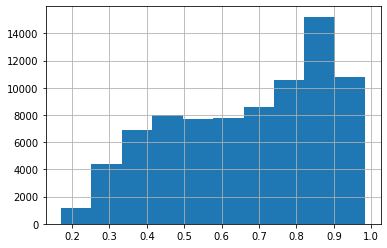

In [716]:
vis['conf_stack'].hist()

<AxesSubplot:>

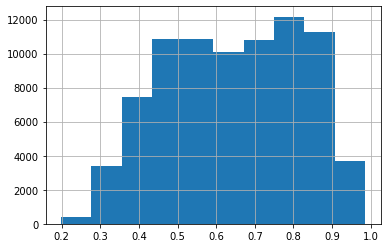

In [717]:
vis['conf_vote'].hist()

In [715]:
vis.to_csv('data_storage/images/IMG_pred_150_cat.csv',sep='\t')